In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from datagen import *
from plot import reward_3d
from fairopt import FairOptimization

# Univariate Loan Data

In [2]:
s, a, y = dat_gen_loan_univariate(
    6000, intcp=-1, beta_a=2, beta_s=1, lmbd_a=0.5
)
s_train, s_test = s[:5000], s[5000:]
a_train, a_test = a[:5000], a[5000:]
y_train, y_test = y[:5000], y[5000:]

## Linear reward function 1

In [3]:
r_star, r = dat_gen_reward_univariate_linear(
    s, a, y, intcp=-1, beta_a=2.5, beta_s=0
)
r_star_train, r_star_test = r_star[:5000], r_star[5000:]
r_train, r_test = r[:5000], r[5000:]

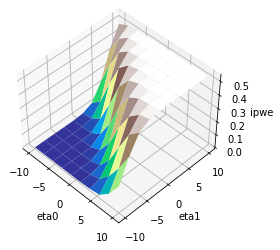

In [4]:
fairopt = FairOptimization(s_train, a_train, y_train, r_train)
reward_3d(fairopt, 'ipwe', [None, None], [(-10, 10), (-10, 10)], estimation_args={'deterministic': False})

In [5]:
methods = ['ML', 'RML', 'FTU', 'AA', 'FLAP-1', 'FLAP-2', 'FLAP-eta-s']
eta_opt = fairopt.optimize(fairopt.ipwe, method='shgo', sampling_method='sobol', estimation_args={'deterministic': False}).x
print('optimal eta: {!s}'.format(eta_opt))
eval = fairopt.evaluate(a_test, s_test, y_test, metrics=['cf', 'mae', 'ers'], methods=methods, r_star_test=r_star_test, eta=eta_opt)
pd.DataFrame(eval, index=['CF', 'MAE', 'E(R)'], columns=methods)

optimal eta: [0.98245239 0.98337632]


,ML,RML,FTU,AA,FLAP-1,FLAP-2,FLAP-eta-s
CF,0.324420,0.187423,0.245538,0.003732,0.000026,0.000028,0.000009
MAE,0.307494,0.343183,0.316629,0.344561,0.351339,0.351348,0.304724
E(R),0.377610,0.354252,0.375046,0.359481,0.353010,0.353009,0.389854


In [13]:
methods = ['ML', 'RML', 'FTU', 'AA', 'FLAP-1', 'FLAP-2', 'FLAP-eta']
eta_opt = fairopt.optimize(fairopt.ipwe, method='shgo', bounds=[(-10, 10), (-10, 10)], estimation_args={'deterministic': True}).x
print('optimal eta: {!s}'.format(eta_opt))
eval = fairopt.evaluate(a_test, s_test, y_test, metrics=['cf', 'mae', 'ers'], methods=methods, r_star_test=r_star_test, eta=eta_opt)
pd.DataFrame(eval, index=['CF', 'MAE', 'E(R)'], columns=methods)

optimal eta: [10. 10.]


,ML,RML,FTU,AA,FLAP-1,FLAP-2,FLAP-eta
CF,0.319407,0.177594,0.234297,0.004750,0.000039,0.000040,0.000
MAE,0.321751,0.363211,0.329341,0.353293,0.359080,0.359070,0.236
E(R),0.363933,0.333167,0.361196,0.344559,0.339723,0.339723,0.440


## Linear reward function 2

In [14]:
r_star, r = dat_gen_reward_univariate_linear(
    s, a, y, intcp=1.5, beta_a=-1, beta_s=-1
)
r_star_train, r_star_test = r_star[:5000], r_star[5000:]
r_train, r_test = r[:5000], r[5000:]

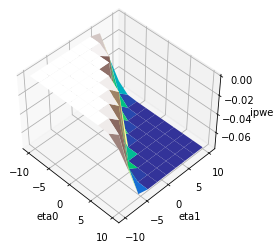

In [15]:
fairopt = FairOptimization(s_train, a_train, y_train, r_train)
reward_3d(fairopt, 'ipwe', [None, None], [(-10, 10), (-10, 10)])

In [16]:
methods = ['ML', 'RML', 'FTU', 'AA', 'FLAP-1', 'FLAP-2', 'FLAP-eta-s']
eta_opt = fairopt.optimize(fairopt.ipwe, method='shgo', bounds=[(-10, 10), (-10, 10)], estimation_args={'deterministic': False}).x
print('optimal eta: {!s}'.format(eta_opt))
eval = fairopt.evaluate(a_test, s_test, y_test, metrics=['cf', 'mae', 'ers'], methods=methods, r_star_test=r_star_test, eta=eta_opt)
pd.DataFrame(eval, index=['CF', 'MAE', 'E(R)'], columns=methods)

optimal eta: [-10. -10.]


,ML,RML,FTU,AA,FLAP-1,FLAP-2,FLAP-eta-s
CF,0.319407,0.325131,0.234297,0.004750,0.000039,0.00004,5.155999e-10
MAE,0.321751,0.542412,0.329341,0.353293,0.359080,0.35907,7.640000e-01
E(R),-0.031307,0.046689,-0.023519,0.006949,0.007112,0.00709,3.223608e-09


In [17]:
methods = ['ML', 'RML', 'FTU', 'AA', 'FLAP-1', 'FLAP-2', 'FLAP-eta']
eta_opt = fairopt.optimize(fairopt.ipwe, method='shgo', bounds=[(-10, 10), (-10, 10)], estimation_args={'deterministic': True}).x
print('optimal eta: {!s}'.format(eta_opt))
eval = fairopt.evaluate(a_test, s_test, y_test, metrics=['cf', 'mae', 'ers'], methods=methods, r_star_test=r_star_test, eta=eta_opt)
pd.DataFrame(eval, index=['CF', 'MAE', 'E(R)'], columns=methods)

optimal eta: [-10. -10.]


,ML,RML,FTU,AA,FLAP-1,FLAP-2,FLAP-eta
CF,0.319407,0.325131,0.234297,0.004750,0.000039,0.00004,0.000
MAE,0.321751,0.542412,0.329341,0.353293,0.359080,0.35907,0.764
E(R),-0.031307,0.046689,-0.023519,0.006949,0.007112,0.00709,0.000


## Qudratic reward function

In [9]:
r_star, r = dat_gen_reward_univariate_quadratic(
    s, a, y, intcp=-1, beta_a2=-0.5, beta_a=0.7, beta_s=0, beta_as=0
)
r_star_train, r_star_test = r_star[:5000], r_star[5000:]
r_train, r_test = r[:5000], r[5000:]

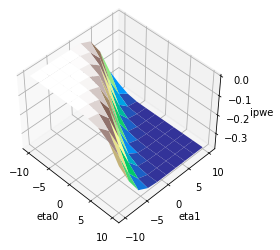

In [10]:
fairopt = FairOptimization(s_train, a_train, y_train, r_train)
reward_3d(fairopt, 'ipwe', [None, None], [(-10, 10), (-10, 10)])

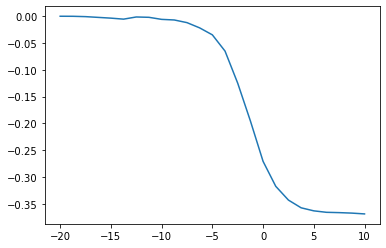

In [11]:
eta = np.linspace(-20, 10, 25)
fq = lambda x: (expit(-1 - 0.5 * x**2 + 0.7 * x) - 0.5) * 2
fy = lambda x, eta1: expit(1 + x*eta1)
def fe(eta):
    x = np.random.normal(0.7, 0.2, 100)
    return np.mean(fq(x) * fy(x, eta))
plt.plot(eta, [fe(e) for e in eta])

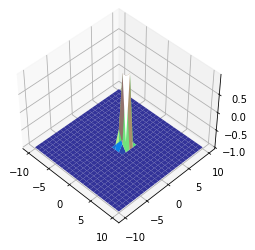

In [12]:
fq = lambda x, y: (expit(-1 - 20*x*x + 30*x - 50*y*y + 40*y + 20 * x * y) - 0.5) * 2
x = np.linspace(-10, 10, 25)
y = np.linspace(-10, 10, 25)
xg, yg = np.meshgrid(x, y)
zg = np.empty_like(xg)
for i in range(len(x)):
    for j in range(len(y)):
        zg[i, j] = fq(x[i], y[j])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, -45)
ax.plot_surface(xg, yg, zg, cmap='terrain')
plt.show()

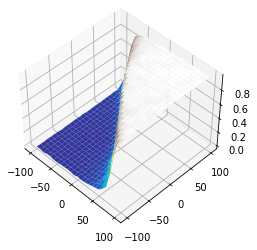

In [13]:
eta1 = np.linspace(-100, 100, 25)
eta2 = np.linspace(-100, 100, 25)
eta1g, eta2g = np.meshgrid(eta1, eta2)
feg = np.empty_like(eta1g)
fy = lambda x, y, eta1, eta2: expit(1 + x*eta1 + y*eta2)
def fe(eta1, eta2):
    x = np.random.normal(0.4, 0.2, 500)
    y = x + np.random.normal(0.1, 0.05, 500)
    return np.mean(fq(x, y) * fy(x, y, eta1, eta2))
for i in range(len(eta1)):
    for j in range(len(eta2)):
        feg[i, j] = fe(eta1[i], eta2[j])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, -45)
ax.plot_surface(eta1g, eta2g, feg, cmap='terrain')
plt.show()


In [15]:
eta_opt = fairopt.optimize(fairopt.ipwe, method='shgo', bounds=[(-10, 10), (-10, 10)]).x
eval = fairopt.evaluate(eta_opt, s_test, a_test, y_test, r_test, r_star_test, ['cf', 'mae', 'ers'])
pd.DataFrame(eval, index=['CF', 'MAE', 'E(R)'], columns=['ML', 'RML', 'FTU', 'AA', 'FLAP-1', 'FLAP-2', 'FLAP-eta'])


,ML,RML,FTU,AA,FLAP-1,FLAP-2,FLAP-eta
CF,0.347271,0.019366,0.247074,0.003481,0.000039,0.000040,8.985496e-10
MAE,0.312135,0.593248,0.320789,0.352758,0.359354,0.359360,7.680000e-01
E(R),-0.266398,-0.112712,-0.265912,-0.269073,-0.264195,-0.264192,-1.318872e-08


# Multivariate Loan data

In [17]:
s, a, y = dat_gen_loan_multivariate(
    6000, beta_e=1, beta_i=2, beta_s=[-1.5, -2.5, -1.5]
)
s_train, s_test = s[:5000], s[5000:]
a_train, a_test = a[:5000], a[5000:]
y_train, y_test = y[:5000], y[5000:]

## Linear reward function

In [18]:
r_star, r = dat_gen_reward_multivariate_linear(
    s, a, y, beta_e=2, beta_i=1, beta_s=[-2, -2, -2]
)
r_star_train, r_star_test = r_star[:5000], r_star[5000:]
r_train, r_test = r[:5000], r[5000:]

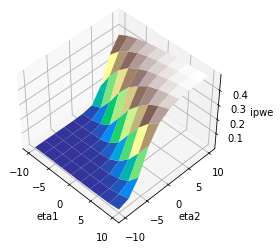

In [19]:
fairopt = FairOptimization(s_train, a_train, y_train, r_train)
reward_3d(fairopt, 'ipwe', [fairopt.ftup.params[0], None, None], [(-10, 10), (-10, 10)])

In [20]:
eta_opt = fairopt.optimize(fairopt.ipwe, method='shgo', bounds=[(-10, 10), (-10, 10), (-10, 10)]).x
eval = fairopt.evaluate(eta_opt, s_test, a_test, y_test, r_test, r_star_test, ['cf', 'mae', 'ers'])
pd.DataFrame(eval, index=['CF', 'MAE', 'E(R)'], columns=['ML', 'RML', 'FTU', 'AA', 'FLAP-1', 'FLAP-2', 'FLAP-eta'])

,ML,RML,FTU,AA,FLAP-1,FLAP-2,FLAP-eta
CF,0.419529,0.186915,0.310424,0.029074,0.000190,0.000185,2.491040e-08
MAE,0.382944,0.386140,0.394087,0.413425,0.414794,0.414824,3.680000e-01
E(R),0.229281,0.248700,0.228678,0.221375,0.219964,0.219979,2.540000e-01


In [22]:
eta_opt = fairopt.optimize(fairopt.aipwe, method='shgo', bounds=[(-10, 10), (-10, 10), (-10, 10)]).x
eval = fairopt.evaluate(eta_opt, s_test, a_test, y_test, r_test, r_star_test, ['cf', 'mae', 'ers'])
pd.DataFrame(eval, index=['CF', 'MAE', 'E(R)'], columns=['ML', 'RML', 'FTU', 'AA', 'FLAP-1', 'FLAP-2', 'FLAP-eta'])

,ML,RML,FTU,AA,FLAP-1,FLAP-2,FLAP-eta
CF,0.419529,0.186915,0.310424,0.029074,0.000190,0.000185,0.000036
MAE,0.382944,0.386140,0.394087,0.413425,0.414794,0.414824,0.375055
E(R),0.229281,0.248700,0.228678,0.221375,0.219964,0.219979,0.246319


## Quadratic reward function

In [14]:
r_star, r = dat_gen_reward_multivariate_quadratic(
    s, a, y, beta_e=2, beta_e2=0.1, beta_i=1, beta_i2=-0.1, beta_ei= 0.5, 
    beta_s=[-2.5, -2, -2.5]
)
r_star_train, r_star_test = r_star[:5000], r_star[5000:]
r_train, r_test = r[:5000], r[5000:]

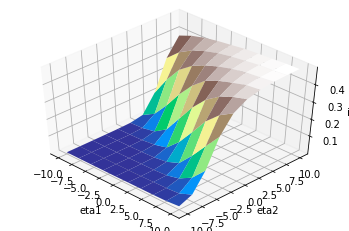

In [15]:
fairopt = FairOptimization(s_train, a_train, y_train, r_train)
reward_3d(fairopt, 'ipwe', [fairopt.ftup.params[0], None, None], [(-10, 10), (-10, 10)])

In [16]:
eta_opt = fairopt.optimize(fairopt.ipwe, method='shgo', bounds=[(-1.6, -1.5), (-10, 10), (-10, 10)]).x
eval = fairopt.evaluate(eta_opt, s_test, a_test, y_test, r_test, r_star_test, ['cf', 'mae', 'ers'])
pd.DataFrame(eval, index=['CF', 'MAE', 'E(R)'], columns=['ML', 'FTU', 'AA', 'FLAP-1', 'FLAP-2', 'FLAP-eta'])

,ML,FTU,AA,FLAP-1,FLAP-2,FLAP-eta
CF,0.454108,0.319917,0.026516,0.000200,0.000193,0.002186
MAE,0.377075,0.388599,0.407314,0.408728,0.408784,0.376445
E(R),0.240866,0.239790,0.236063,0.233519,0.233500,0.255577


In [17]:
eta_opt = fairopt.optimize(fairopt.aipwe, method='shgo', bounds=[(-1.6, -1.5), (-10, 10), (-10, 10)]).x
eval = fairopt.evaluate(eta_opt, s_test, a_test, y_test, r_test, r_star_test, ['cf', 'mae', 'ers'])
pd.DataFrame(eval, index=['CF', 'MAE', 'E(R)'], columns=['ML', 'FTU', 'AA', 'FLAP-1', 'FLAP-2', 'FLAP-eta'])

,ML,FTU,AA,FLAP-1,FLAP-2,FLAP-eta
CF,0.454108,0.319917,0.026516,0.000200,0.000193,0.002194
MAE,0.377075,0.388599,0.407314,0.408728,0.408784,0.376441
E(R),0.240866,0.239790,0.236063,0.233519,0.233500,0.255580
